In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
k = 1
strain = 'iAF1260'
df = pd.read_csv(f"FD_OP_k{k}_{strain}_w.csv")

In [3]:
df.columns

Index(['Unnamed: 0', 'MB', 'MC', 'CB', 'CC', 'PB', 'PC', 'tgt', 'Bio', 'Che',
       'Mys', 'Cys', 'Pys', 'Mt', 'Ct', 'Pt', 'ICB_mb', 'ICC_mb', 'ICB_mc',
       'ICC_mc', 'ICB_cb', 'ICC_cb', 'ICB_cc', 'ICC_cc', 'ICB_pb', 'ICC_pb',
       'ICB_pc', 'ICC_pc'],
      dtype='object')

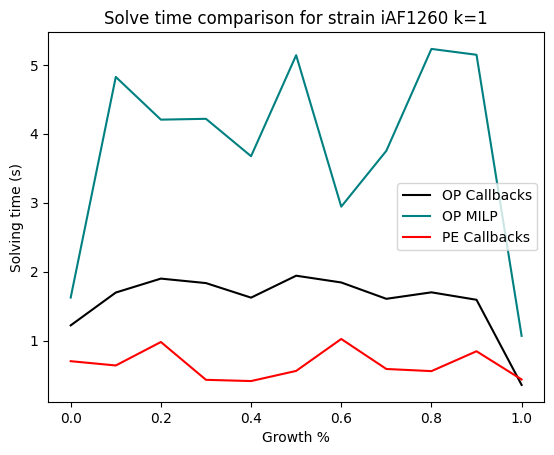

In [4]:
fig,ax = plt.subplots()

ax.set_title(f"Solve time comparison for strain {strain} k={k}")
plt.xlabel(f"Growth %")
plt.ylabel(f"Solving time (s)")
plt.plot(df['tgt'],df['Ct'],label='OP Callbacks',color='black')
plt.plot(df['tgt'],df['Mt'],label='OP MILP',color='teal')
plt.plot(df['tgt'],df['Pt'],label='PE Callbacks',color='red')
ax.legend()

In [5]:
iaf = pd.read_csv(f"FD_OP_k{1}_{'iAF1260'}_w.csv")
ijo = pd.read_csv(f"FD_OP_k{1}_{'iJO1366'}_w.csv")
ijr = pd.read_csv(f"FD_OP_k{1}_{'iJR904'}_w.csv")

In [6]:
iaf['Strain'] = ['iAF1260' for i in range(len(iaf))]
ijo['Strain'] = ['iJO1366' for i in range(len(ijo))]
ijr['Strain'] = ['iJR904' for i in range(len(ijr))]

st = pd.concat([iaf,ijo,ijr],sort=False)

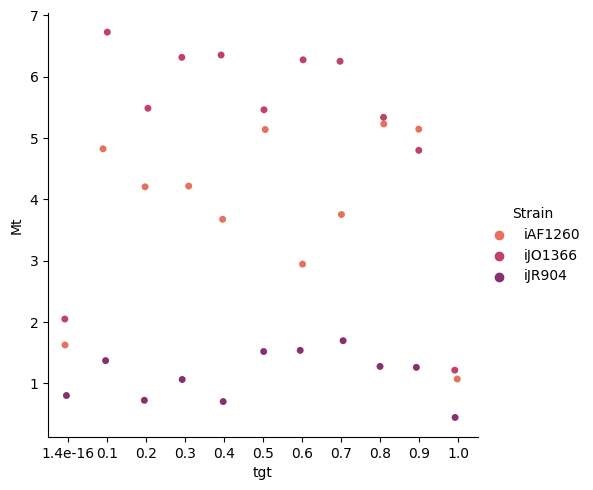

In [7]:
import seaborn as sns
sns.catplot(data=st,x='tgt',y='Mt',hue='Strain',palette='flare')

In [8]:
iaf.head()

,Unnamed: 0,MB,MC,CB,CC,PB,PC,tgt,Bio,Che,...,ICC_mc,ICB_cb,ICC_cb,ICB_cc,ICC_cc,ICB_pb,ICC_pb,ICB_pc,ICC_pc,Strain
0,0,0.88557,0.00008,0.88557,0.00011,0.88557,0.00011,1.0,0.88557,0.00000,...,-0.00000,0.88557,0.88557,0.00000,-0.00000,0.88557,0.88557,0.00000,-0.00000,iAF1260
1,1,0.81763,0.85104,0.81763,0.85092,0.81763,0.85092,0.9,0.79701,2.39767,...,1.98859,0.81763,0.79701,0.85092,1.98859,0.81763,0.79701,0.85092,1.98859,iAF1260
2,2,0.81763,0.85103,0.81763,0.85092,0.70846,3.99248,0.8,0.70846,3.99242,...,3.88330,0.81763,0.70846,0.85092,3.88330,0.88557,0.70846,0.00000,3.99242,iAF1260
3,3,0.81761,0.85215,0.81763,0.85092,0.61990,5.58515,0.7,0.61990,5.58510,...,5.56845,0.81763,0.61990,0.85092,5.56845,0.88557,0.61990,0.00000,5.58510,iAF1260
4,4,0.53134,7.17782,0.81763,0.85092,0.81763,0.85092,0.6,0.53134,7.17777,...,7.17777,0.81763,0.53134,0.85092,7.11735,0.81763,0.53134,0.85092,7.11735,iAF1260


In [9]:
ijr.CB

0     0.92195
1     0.84459
2     0.73756
3     0.64536
4     0.55317
5     0.46097
6     0.36878
7     0.27658
8     0.18439
9     0.09219
10   -0.00000
Name: CB, dtype: float64

In [10]:
re = {'Biomass':df.MB.tolist() + df.CB.tolist() + df.PB.tolist(),
      'Chemical':df.MC.tolist() + df.CC.tolist() + df.PC.tolist(),
      'Method': ['M' for _ in range(len(df.MB))] + ['C' for _ in range(len(df.CB))] + ['P' for _ in range(len(df.PB))],
      'Time': df.Mt.tolist() + df.Ct.tolist() + df.Pt.tolist(),
      'Tgt': df.tgt.tolist() + df.tgt.tolist() + df.tgt.tolist(),
      'Strain':['iAF1260' for _ in range(len(df)*3)]}

In [11]:
redf = pd.DataFrame.from_dict(re)

<AxesSubplot: title={'center': 'Solve time comparison k=1'}, xlabel='Tgt', ylabel='Solving time (s)'>

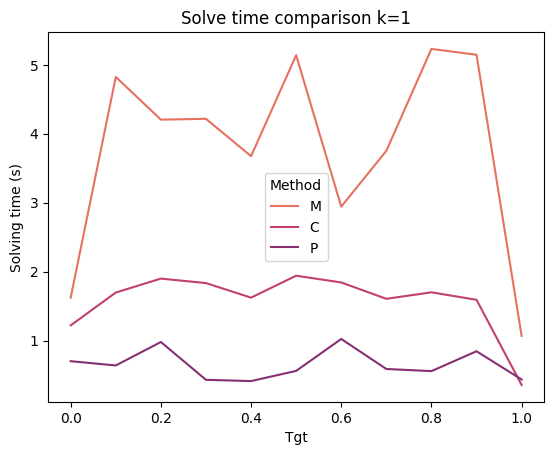

In [12]:
fig,ax = plt.subplots()

ax.set_title(f"Solve time comparison k={1}")
plt.ylabel(f"Solving time (s)")
sns.lineplot(x='Tgt',y='Time',hue='Method',data=redf,palette='flare')

In [13]:
import ast
df['K'] = df.apply(lambda row: len(ast.literal_eval(row.Cys)),axis=1)

In [14]:
df.K.tolist()

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

In [15]:
DF = pd.read_csv('FD_OP_MasterSum.csv')

<AxesSubplot: xlabel='Tgt', ylabel='Time'>

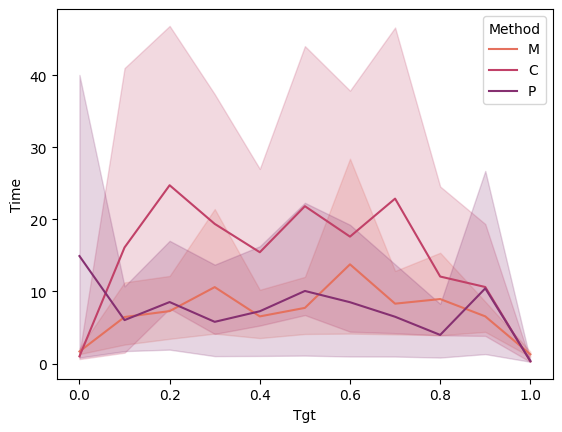

In [16]:
sns.lineplot(x='Tgt',y='Time',hue='Method',data=DF,palette='flare')

<AxesSubplot: xlabel='Tgt', ylabel='Time'>

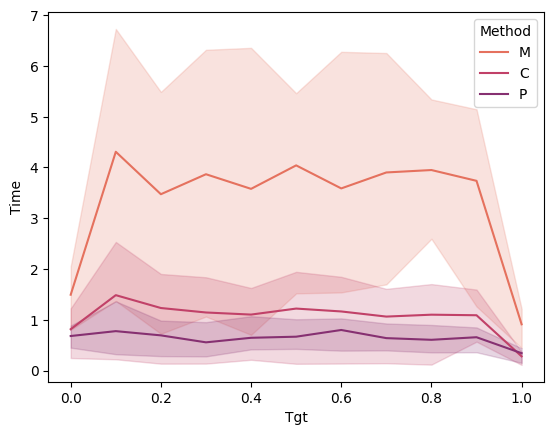

In [17]:
sns.lineplot(x='Tgt',y='Time',hue='Method',data=DF[DF['K']==1],palette='flare')

<AxesSubplot: xlabel='Tgt', ylabel='Time'>

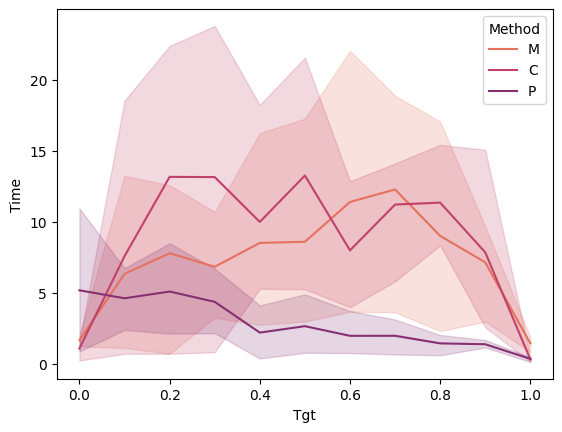

In [18]:
sns.lineplot(x='Tgt',y='Time',hue='Method',data=DF[DF['K']==2],palette='flare')

<AxesSubplot: xlabel='Tgt', ylabel='Time'>

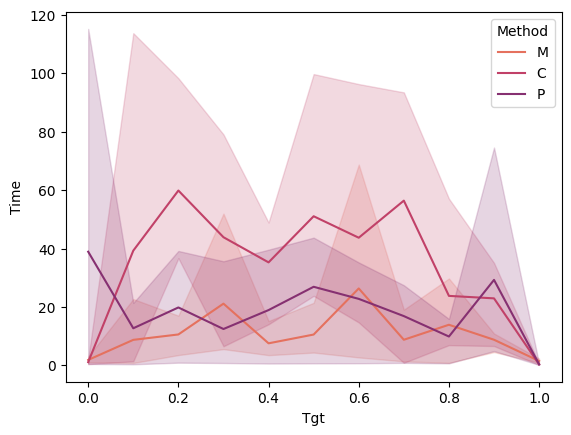

In [19]:
sns.lineplot(x='Tgt',y='Time',hue='Method',data=DF[DF['K']==3],palette='flare')

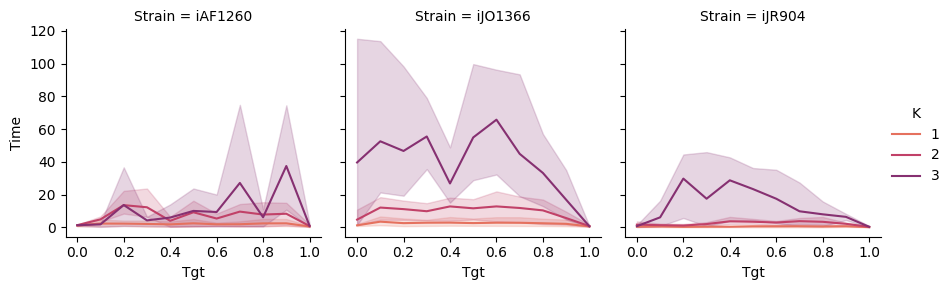

In [20]:
g = sns.FacetGrid(DF, col="Strain",hue='K',palette='flare')

g.map(sns.lineplot,'Tgt','Time')
g.add_legend()

c:\Users\alexa\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:712: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


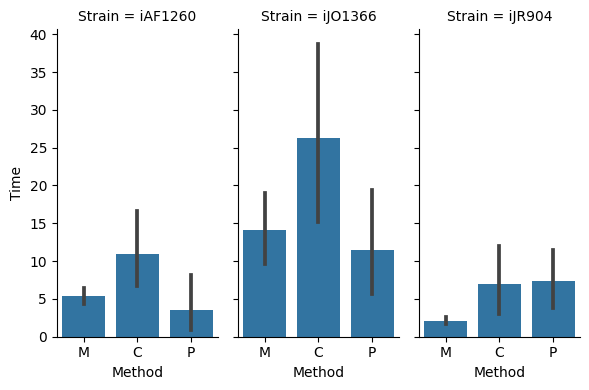

In [21]:
g = sns.FacetGrid(DF ,col="Strain", height=4, aspect=.5)
g.map(sns.barplot, "Method", "Time")

c:\Users\alexa\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:712: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


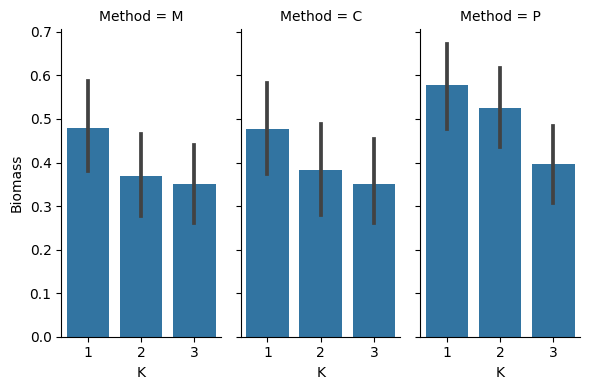

In [22]:
g = sns.FacetGrid(DF ,col="Method", height=4, aspect=.5)
g.map(sns.barplot, "K", "Biomass")

In [23]:
# g = sns.FacetGrid(DF ,col="Strain",hue='K' ,height=4, aspect=.5)
# g.map(sns.scatter, "Method", "Biomass")

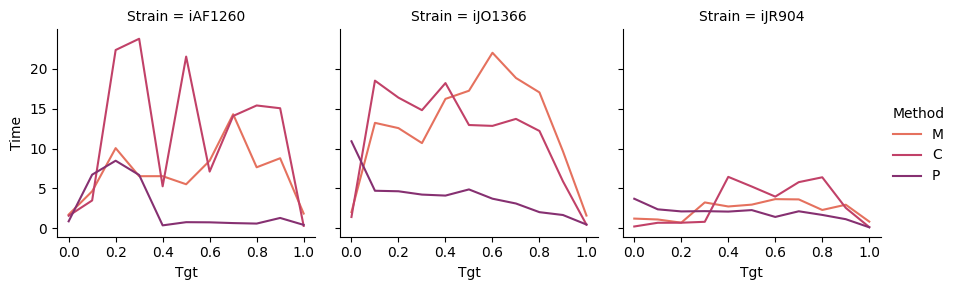

In [24]:
g = sns.FacetGrid(DF[DF['K']==2] ,col="Strain",hue='Method',palette='flare')
g.map(sns.lineplot,'Tgt','Time')
g.add_legend()

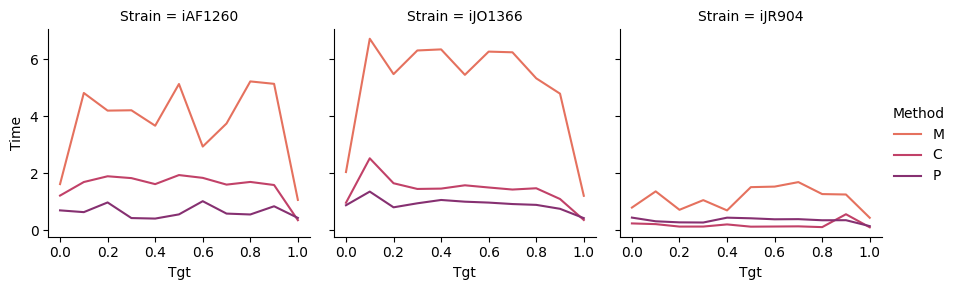

In [25]:
g = sns.FacetGrid(DF[DF['K']==1] ,col="Strain",hue='Method',palette='flare')
g.map(sns.lineplot,'Tgt','Time')
g.add_legend()

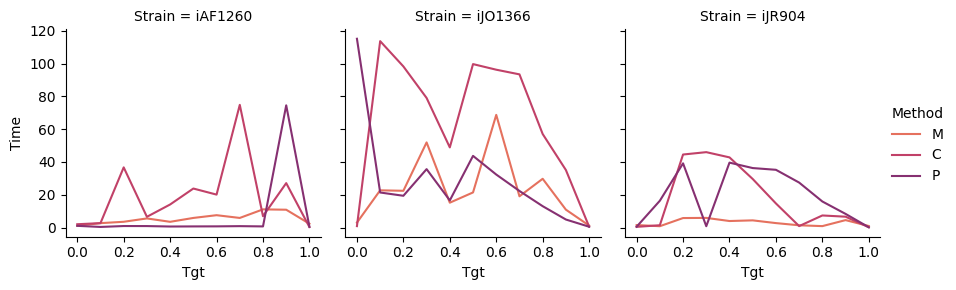

In [26]:
g = sns.FacetGrid(DF[DF['K']==3] ,col="Strain",hue='Method',palette='flare')
g.map(sns.lineplot,'Tgt','Time')
g.add_legend()

In [27]:
DF[['Biomass','Chemical','Strategy','Method']][(DF['Strain'] == 'iAF1260') & (DF['K'] == 1)]

,Biomass,Chemical,Strategy,Method
0,0.88557,0.00008,['PYK'],M
1,0.81763,0.85104,['FUM'],M
2,0.81763,0.85103,['FUM'],M
3,0.81761,0.85215,['FUM'],M
4,0.53134,7.17782,['RPI'],M
5,0.81761,0.85220,['FUM'],M
6,0.81757,0.85443,['FUM'],M
7,0.81760,0.85266,['FUM'],M
8,0.81759,0.85365,['FUM'],M
9,0.81761,0.85232,['FUM'],M


In [28]:
DF.columns

Index(['Unnamed: 0', 'Biomass', 'Chemical', 'Method', 'Time', 'Tgt', 'Strain',
       'K', 'Strategy'],
      dtype='object')

In [29]:
DF['pctGro'] = DF.apply(lambda row: f"{int(row.Tgt*100)}%",axis=1)

In [30]:
DF[['pctGro','Biomass','Chemical','Method']][(DF['Strain'] == 'iAF1260') & (DF['K'] ==1)]

,pctGro,Biomass,Chemical,Method
0,100%,0.88557,0.00008,M
1,90%,0.81763,0.85104,M
2,80%,0.81763,0.85103,M
3,70%,0.81761,0.85215,M
4,60%,0.53134,7.17782,M
5,50%,0.81761,0.85220,M
6,40%,0.81757,0.85443,M
7,30%,0.81760,0.85266,M
8,20%,0.81759,0.85365,M
9,10%,0.81761,0.85232,M


In [31]:
DF.pivot(index="Method", columns=["Strain", "pctGro",'K'], values="Time")

Strain iAF1260                                                                 \
pctGro    100%    90%    80%    70%    60%    50%    40%    30%    20%    10%   
K            1      1      1      1      1      1      1      1      1      1   
Method                                                                          
C        0.360  1.594  1.702  1.608  1.845  1.943  1.625  1.836  1.901  1.699   
M        1.071  5.145  5.230  3.753  2.944  5.139  3.675  4.217  4.205  4.824   
P        0.439  0.848  0.560  0.591  1.026  0.563  0.416  0.434  0.982  0.642   

Strain  ... iJR904                                                          \
pctGro  ...    90%     80%     70%     60%     50%     40%     30%     20%   
K       ...      3       3       3       3       3       3       3       3   
Method  ...                                                                  
C       ...  6.613   7.361   0.872  14.695  29.624  42.809  46.005  44.559   
M       ...  4.524   0.860   1.364   2.704   4.371   3.968   5.878   5.786   
P       ...  8.317  15.891  27.436  35.233  36.295  39.607   0.797  39.168   

Strain                 
pctGro     10%     0%  
K            3      3  
Method                 
C        1.401  0.401  
M        0.806  1.502  
P       16.347  0.487  

[3 rows x 99 columns]

In [32]:
table = DF[(DF.Strain =='iAF1260')&(DF.K ==1)].pivot(index='Method',columns=['Strain','pctGro'],values='Time')

In [33]:
print(table.style.to_latex())

\begin{tabular}{lrrrrrrrrrrr}
Strain & \multicolumn{11}{r}{iAF1260} \\
pctGro & 100% & 90% & 80% & 70% & 60% & 50% & 40% & 30% & 20% & 10% & 0% \\
Method &  &  &  &  &  &  &  &  &  &  &  \\
C & 0.360000 & 1.594000 & 1.702000 & 1.608000 & 1.845000 & 1.943000 & 1.625000 & 1.836000 & 1.901000 & 1.699000 & 1.223000 \\
M & 1.071000 & 5.145000 & 5.230000 & 3.753000 & 2.944000 & 5.139000 & 3.675000 & 4.217000 & 4.205000 & 4.824000 & 1.626000 \\
P & 0.439000 & 0.848000 & 0.560000 & 0.591000 & 1.026000 & 0.563000 & 0.416000 & 0.434000 & 0.982000 & 0.642000 & 0.704000 \\
\end{tabular}



In [34]:
table.round(decimals=3)

Strain iAF1260                                                                 \
pctGro    100%    90%    80%    70%    60%    50%    40%    30%    20%    10%   
Method                                                                          
C        0.360  1.594  1.702  1.608  1.845  1.943  1.625  1.836  1.901  1.699   
M        1.071  5.145  5.230  3.753  2.944  5.139  3.675  4.217  4.205  4.824   
P        0.439  0.848  0.560  0.591  1.026  0.563  0.416  0.434  0.982  0.642   

Strain         
pctGro     0%  
Method         
C       1.223  
M       1.626  
P       0.704

In [35]:
print(table.style.to_latex())

\begin{tabular}{lrrrrrrrrrrr}
Strain & \multicolumn{11}{r}{iAF1260} \\
pctGro & 100% & 90% & 80% & 70% & 60% & 50% & 40% & 30% & 20% & 10% & 0% \\
Method &  &  &  &  &  &  &  &  &  &  &  \\
C & 0.360000 & 1.594000 & 1.702000 & 1.608000 & 1.845000 & 1.943000 & 1.625000 & 1.836000 & 1.901000 & 1.699000 & 1.223000 \\
M & 1.071000 & 5.145000 & 5.230000 & 3.753000 & 2.944000 & 5.139000 & 3.675000 & 4.217000 & 4.205000 & 4.824000 & 1.626000 \\
P & 0.439000 & 0.848000 & 0.560000 & 0.591000 & 1.026000 & 0.563000 & 0.416000 & 0.434000 & 0.982000 & 0.642000 & 0.704000 \\
\end{tabular}



In [36]:
tableb = DF[(DF.Strain =='iAF1260')&(DF.K ==1)].pivot(index='Method',columns=['Strain','pctGro'],values='Biomass')

In [37]:
tableb

Strain  iAF1260                                                        \
pctGro     100%      90%      80%      70%      60%      50%      40%   
Method                                                                  
C       0.88557  0.81763  0.81763  0.81763  0.81763  0.81763  0.81763   
M       0.88557  0.81763  0.81763  0.81761  0.53134  0.81761  0.81757   
P       0.88557  0.81763  0.70846  0.61990  0.81763  0.86653  0.87738   

Strain                                  
pctGro      30%      20%      10%   0%  
Method                                  
C       0.81763  0.81763  0.81763  0.0  
M       0.81760  0.81759  0.81761  0.0  
P       0.87738  0.81763  0.86268  0.0

In [38]:
DF[(DF.Strain =='iJO1366')&(DF.K ==2)].pivot(index='Method',columns=['Strain','pctGro'],values='Biomass')

Strain iJO1366                                                                 \
pctGro    100%      90%      80%      70%      60%      50%      40%      30%   
Method                                                                          
C       0.2415  0.24009  0.24009  0.18311  0.18311  0.18311  0.11729  0.11729   
M       0.2415  0.24009  0.24008  0.18311  0.18311  0.18311  0.11729  0.11729   
P       0.2415  0.24009  0.24009  0.24009  0.24009  0.24009  0.24009  0.24009   

Strain                             
pctGro      20%      10%       0%  
Method                             
C       0.05310  0.05310 -0.00000  
M       0.05310  0.05310 -0.00000  
P       0.24009  0.24009  0.24009

In [39]:
DF[(DF.Strain =='iJO1366')&(DF.K ==2)].pivot(index='Method',columns=['Strain','pctGro'],values='Chemical')

Strain  iJO1366                                                        \
pctGro     100%      90%      80%      70%      60%      50%      40%   
Method                                                                  
C       0.08008  0.25037  0.25037  1.41479  1.41479  1.41479  2.31308   
M       0.08005  0.25041  0.25087  1.41483  1.41483  1.41483  2.31314   
P       0.08015  0.25037  0.25037  0.25037  0.25037  0.25037  0.25037   

Strain                                       
pctGro      30%      20%      10%        0%  
Method                                       
C       2.31308  8.97926  8.97926  15.76889  
M       2.31308  8.97928  8.97928  15.76889  
P       0.25037  0.25037  0.25037   0.25037

In [40]:
def printlatex(strain,k):
    table = DF[(DF.Strain == strain)&(DF.K ==k)].pivot(index=['Method'],columns=['Strain','pctGro'],values='Time').round(decimals=3)
    t = table
    print(t.style.to_latex())
    print(f"\n")
    table = None

In [41]:
for k in [1,2,3]:
    printlatex('iAF1260',k)

\begin{tabular}{lrrrrrrrrrrr}
Strain & \multicolumn{11}{r}{iAF1260} \\
pctGro & 100% & 90% & 80% & 70% & 60% & 50% & 40% & 30% & 20% & 10% & 0% \\
Method &  &  &  &  &  &  &  &  &  &  &  \\
C & 0.360000 & 1.594000 & 1.702000 & 1.608000 & 1.845000 & 1.943000 & 1.625000 & 1.836000 & 1.901000 & 1.699000 & 1.223000 \\
M & 1.071000 & 5.145000 & 5.230000 & 3.753000 & 2.944000 & 5.139000 & 3.675000 & 4.217000 & 4.205000 & 4.824000 & 1.626000 \\
P & 0.439000 & 0.848000 & 0.560000 & 0.591000 & 1.026000 & 0.563000 & 0.416000 & 0.434000 & 0.982000 & 0.642000 & 0.704000 \\
\end{tabular}



\begin{tabular}{lrrrrrrrrrrr}
Strain & \multicolumn{11}{r}{iAF1260} \\
pctGro & 100% & 90% & 80% & 70% & 60% & 50% & 40% & 30% & 20% & 10% & 0% \\
Method &  &  &  &  &  &  &  &  &  &  &  \\
C & 0.312000 & 15.063000 & 15.410000 & 14.096000 & 7.120000 & 21.541000 & 5.276000 & 23.775000 & 22.365000 & 3.501000 & 1.579000 \\
M & 1.860000 & 8.793000 & 7.659000 & 14.311000 & 8.483000 & 5.531000 & 6.545000 & 6.542000 & 

In [42]:
for k in [1,2,3]:
    printlatex('iJO1366',k)

\begin{tabular}{lrrrrrrrrrrr}
Strain & \multicolumn{11}{r}{iJO1366} \\
pctGro & 100% & 90% & 80% & 70% & 60% & 50% & 40% & 30% & 20% & 10% & 0% \\
Method &  &  &  &  &  &  &  &  &  &  &  \\
C & 0.367000 & 1.103000 & 1.480000 & 1.435000 & 1.507000 & 1.584000 & 1.468000 & 1.456000 & 1.656000 & 2.532000 & 0.971000 \\
M & 1.215000 & 4.800000 & 5.338000 & 6.252000 & 6.276000 & 5.461000 & 6.354000 & 6.316000 & 5.486000 & 6.727000 & 2.049000 \\
P & 0.432000 & 0.759000 & 0.897000 & 0.926000 & 0.977000 & 1.009000 & 1.069000 & 0.952000 & 0.811000 & 1.363000 & 0.884000 \\
\end{tabular}



\begin{tabular}{lrrrrrrrrrrr}
Strain & \multicolumn{11}{r}{iJO1366} \\
pctGro & 100% & 90% & 80% & 70% & 60% & 50% & 40% & 30% & 20% & 10% & 0% \\
Method &  &  &  &  &  &  &  &  &  &  &  \\
C & 0.464000 & 5.896000 & 12.213000 & 13.728000 & 12.851000 & 12.959000 & 18.217000 & 14.821000 & 16.391000 & 18.523000 & 1.424000 \\
M & 1.607000 & 9.661000 & 17.046000 & 18.857000 & 22.020000 & 17.256000 & 16.237000 & 10.69

In [43]:
for k in [1,2,3]:
    printlatex('iJR904',k)

\begin{tabular}{lrrrrrrrrrrr}
Strain & \multicolumn{11}{r}{iJR904} \\
pctGro & 100% & 90% & 80% & 70% & 60% & 50% & 40% & 30% & 20% & 10% & 0% \\
Method &  &  &  &  &  &  &  &  &  &  &  \\
C & 0.110000 & 0.568000 & 0.116000 & 0.143000 & 0.137000 & 0.132000 & 0.211000 & 0.136000 & 0.135000 & 0.221000 & 0.246000 \\
M & 0.444000 & 1.261000 & 1.276000 & 1.696000 & 1.538000 & 1.519000 & 0.703000 & 1.063000 & 0.724000 & 1.371000 & 0.802000 \\
P & 0.151000 & 0.359000 & 0.357000 & 0.396000 & 0.391000 & 0.426000 & 0.448000 & 0.278000 & 0.283000 & 0.321000 & 0.450000 \\
\end{tabular}



\begin{tabular}{lrrrrrrrrrrr}
Strain & \multicolumn{11}{r}{iJR904} \\
pctGro & 100% & 90% & 80% & 70% & 60% & 50% & 40% & 30% & 20% & 10% & 0% \\
Method &  &  &  &  &  &  &  &  &  &  &  \\
C & 0.155000 & 2.568000 & 6.405000 & 5.797000 & 3.983000 & 5.246000 & 6.459000 & 0.823000 & 0.709000 & 0.702000 & 0.236000 \\
M & 0.848000 & 2.967000 & 2.307000 & 3.632000 & 3.666000 & 2.977000 & 2.745000 & 3.253000 & 0.715000 

In [44]:
dfbc = DF[(DF.Strain =='iJO1366')&(DF.K ==2)].pivot(index='pctGro',columns=['Method'],values=['Chemical','Biomass','Strategy'])

In [45]:
def printlatex_b_c(df,strain,k):
    dfr = df.round(2)
    table = dfr[(dfr.Strain == strain)&(dfr.K ==k)].pivot(index=['pctGro'],columns=["Method"],values=['Biomass','Chemical','Strategy'])
    s = table.style.format(precision=2)
    print(s.to_latex())
    print(f"\n")
    table = None
    

In [46]:
for k in [1,2,3]:
    printlatex_b_c(DF,'iJR904',k)

\begin{tabular}{llllllllll}
 & \multicolumn{3}{r}{Biomass} & \multicolumn{3}{r}{Chemical} & \multicolumn{3}{r}{Strategy} \\
Method & C & M & P & C & M & P & C & M & P \\
pctGro &  &  &  &  &  &  &  &  &  \\
0% & -0.00 & -0.00 & 0.63 & 27.49 & 27.49 & 6.42 & ['CS'] & ['ICDHyr'] & ['GAPD'] \\
10% & 0.09 & 0.09 & 0.84 & 25.19 & 25.19 & 1.64 & ['CS'] & ['CS'] & ['TPI'] \\
100% & 0.92 & 0.92 & 0.92 & 0.00 & 0.00 & 0.00 & ['ACALD'] & ['PYK'] & ['FRD2'] \\
20% & 0.18 & 0.18 & 0.84 & 22.88 & 22.88 & 1.64 & ['CS'] & ['ICDHyr'] & ['TPI'] \\
30% & 0.28 & 0.28 & 0.84 & 20.50 & 20.50 & 1.64 & ['CS'] & ['ICDHyr'] & ['TPI'] \\
40% & 0.37 & 0.37 & 0.63 & 18.03 & 18.03 & 6.42 & ['CS'] & ['CS'] & ['GAPD'] \\
50% & 0.46 & 0.63 & 0.63 & 15.52 & 6.42 & 6.42 & ['CS'] & ['GAPD'] & ['PGK'] \\
60% & 0.55 & 0.63 & 0.63 & 13.02 & 6.42 & 6.42 & ['CS'] & ['PGK'] & ['PGK'] \\
70% & 0.65 & 0.75 & 0.75 & 10.44 & 3.80 & 3.80 & ['CS'] & ['PGM'] & ['ENO'] \\
80% & 0.74 & 0.75 & 0.75 & 7.28 & 3.80 & 3.80 & ['CS'] & ['ENO

In [47]:
for k in [1,2,3]:
    printlatex_b_c(DF,'iJO1366',k)

\begin{tabular}{llllllllll}
 & \multicolumn{3}{r}{Biomass} & \multicolumn{3}{r}{Chemical} & \multicolumn{3}{r}{Strategy} \\
Method & C & M & P & C & M & P & C & M & P \\
pctGro &  &  &  &  &  &  &  &  &  \\
0% & -0.00 & -0.00 & 0.24 & 15.77 & 15.77 & 0.25 & ['ICDHyr'] & ['ICDHyr'] & ['FUM'] \\
10% & 0.24 & 0.24 & 0.24 & 0.25 & 0.25 & 0.25 & ['FUM'] & ['FUM'] & ['FUM'] \\
100% & 0.24 & 0.24 & 0.24 & 0.08 & 0.08 & 0.08 & ['PYK'] & ['GLCabcpp'] & ['AKGDH'] \\
20% & 0.24 & 0.24 & 0.24 & 0.25 & 0.25 & 0.25 & ['FUM'] & ['FUM'] & ['FUM'] \\
30% & 0.24 & 0.24 & 0.24 & 0.25 & 0.25 & 0.25 & ['FUM'] & ['FUM'] & ['FUM'] \\
40% & 0.24 & 0.24 & 0.24 & 0.25 & 0.25 & 0.25 & ['FUM'] & ['FUM'] & ['FUM'] \\
50% & 0.24 & 0.24 & 0.24 & 0.25 & 0.25 & 0.25 & ['FUM'] & ['FUM'] & ['FUM'] \\
60% & 0.24 & 0.24 & 0.24 & 0.25 & 0.25 & 0.25 & ['FUM'] & ['FUM'] & ['FUM'] \\
70% & 0.24 & 0.24 & 0.24 & 0.25 & 0.25 & 0.25 & ['FUM'] & ['FUM'] & ['FUM'] \\
80% & 0.24 & 0.24 & 0.24 & 0.25 & 0.25 & 0.25 & ['FUM'] & ['FUM']

In [48]:
dfr = DF.style.format(precision=2)

In [49]:
dfr.columns

Index(['Unnamed: 0', 'Biomass', 'Chemical', 'Method', 'Time', 'Tgt', 'Strain',
       'K', 'Strategy', 'pctGro'],
      dtype='object')

In [50]:
s = DF.style.format(precision=2)

In [51]:
DF[(DF.Strain == 'iJO1366')].pivot(index=['pctGro',"K"],columns=["Method"],values=['Biomass','Chemical'])

Biomass                    Chemical                   
Method          C        M        P         C         M        P
pctGro K                                                        
0%     1 -0.00000 -0.00000  0.24009  15.76889  15.76889  0.25037
       2 -0.00000 -0.00000  0.24009  15.76889  15.76889  0.25037
       3 -0.00000 -0.00000  0.24009  15.76889  15.76889  0.25037
10%    1  0.24009  0.24009  0.24009   0.25037   0.25039  0.25037
       2  0.05310  0.05310  0.24009   8.97926   8.97928  0.25037
       3  0.05128  0.05128  0.05128   9.60880   9.60933  9.60880
100%   1  0.24150  0.24150  0.24150   0.08008   0.08005  0.08008
       2  0.24150  0.24150  0.24150   0.08008   0.08005  0.08015
       3  0.24150  0.24150  0.24150   0.08007   0.08007  0.08005
20%    1  0.24009  0.24009  0.24009   0.25037   0.25037  0.25037
       2  0.05310  0.05310  0.24009   8.97926   8.97928  0.25037
       3  0.05128  0.05128  0.05128   9.60880   9.60881  9.60880
30%    1  0.24009  0.24009  0.24009   0.25037   0.25037  0.25037
       2  0.11729  0.11729  0.24009   2.31308   2.31308  0.25037
       3  0.11256  0.11256  0.11256   9.10913   9.10914  4.23358
40%    1  0.24009  0.24009  0.24009   0.25037   0.25041  0.25037
       2  0.11729  0.11729  0.24009   2.31308   2.31314  0.25037
       3  0.11256  0.11256  0.11256   9.10913   9.10917  9.10913
50%    1  0.24009  0.24009  0.24009   0.25037   0.25039  0.25037
       2  0.18311  0.18311  0.24009   1.41479   1.41483  0.25037
       3  0.18311  0.18306  0.24009   1.41479   1.42275  0.25037
60%    1  0.24009  0.24009  0.24009   0.25037   0.25039  0.25037
       2  0.18311  0.18311  0.24009   1.41479   1.41483  0.25037
       3  0.18311  0.18311  0.24009   1.41479   1.41487  0.25037
70%    1  0.24009  0.24009  0.24009   0.25037   0.25039  0.25037
       2  0.18311  0.18311  0.24009   1.41479   1.41483  0.25037
       3  0.18311  0.18311  0.24009   1.41479   1.41479  0.25037
80%    1  0.24009  0.24009  0.24009   0.25037   0.25039  0.25037
       2  0.24009  0.24008  0.24009   0.25037   0.25087  0.25037
       3  0.24009  0.24005  0.24009   0.25037   0.25298  0.25037
90%    1  0.24009  0.24009  0.24009   0.25037   0.25039  0.25037
       2  0.24009  0.24009  0.24009   0.25037   0.25041  0.25037
       3  0.24009  0.23816  0.24009   0.25037   0.25083  0.25037

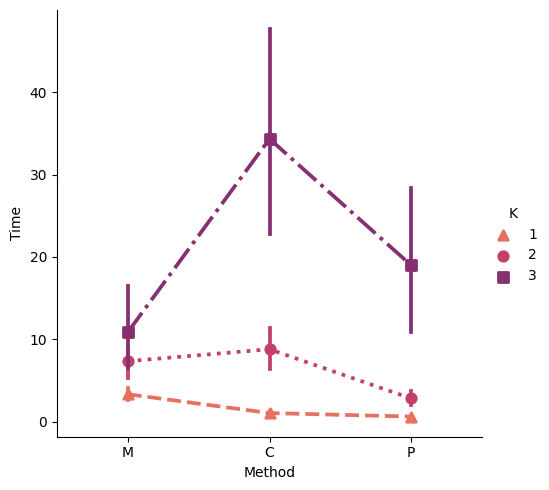

In [52]:
sns.catplot(data=DF,x='Method',y='Time',hue='K',kind='point',palette='flare',linestyles=['dashed','dotted','dashdot'],markers=['^','o','s'])

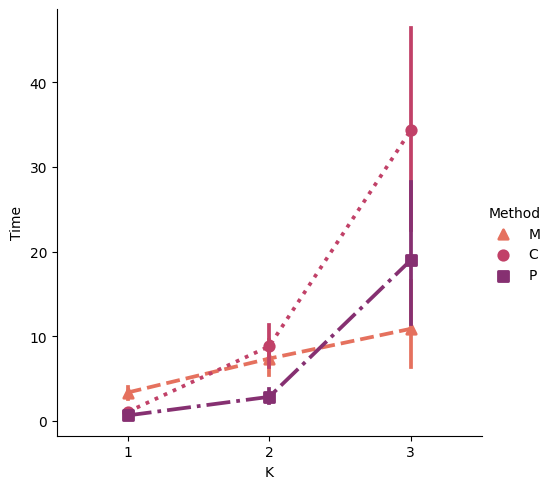

In [53]:
sns.catplot(data=DF,x='K',y='Time',hue='Method',kind='point',palette='flare',linestyles=['dashed','dotted','dashdot'],markers=['^','o','s'])

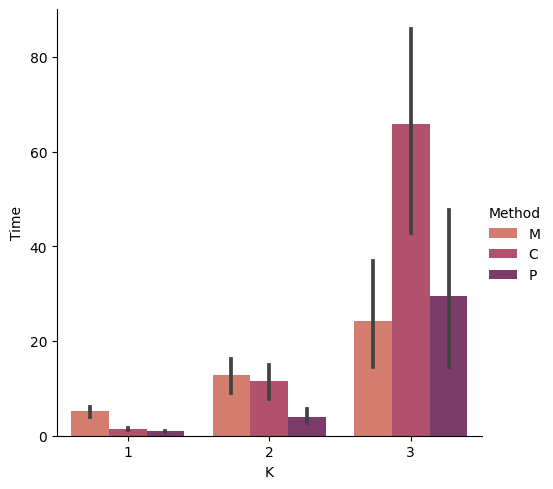

In [54]:
sns.catplot(data=DF[DF.Strain == 'iJO1366'],x='K',y='Time',hue='Method',kind='bar',palette='flare')

In [55]:
DF[(DF.Strain == 'iJR904') & (DF.Method == 'M') & (DF.K ==2)]

,Unnamed: 0,Biomass,Chemical,Method,Time,Tgt,Strain,K,Strategy,pctGro
165,0,0.92195,0.00001,M,0.848,1.000000e+00,iJR904,2,"['ACALD', 'PYK']",100%
166,1,0.83255,1.90414,M,2.967,9.000000e-01,iJR904,2,"['PGI', 'TKT1']",90%
167,2,0.73756,6.95550,M,2.307,8.000000e-01,iJR904,2,"['GND', 'RPE']",80%
168,3,0.66986,5.37870,M,3.632,7.000000e-01,iJR904,2,"['HEX1', 'PGM']",70%
169,4,0.55980,7.83264,M,3.666,6.000000e-01,iJR904,2,"['GAPD', 'HEX1']",60%
170,5,0.53219,8.38574,M,2.977,5.000000e-01,iJR904,2,"['PGK', 'PGL']",50%
171,6,0.53218,8.38881,M,2.745,4.000000e-01,iJR904,2,"['G6PDH2r', 'PGK']",40%
172,7,0.53218,8.38994,M,3.253,3.000000e-01,iJR904,2,"['G6PDH2r', 'GAPD']",30%
173,8,0.18439,22.87759,M,0.715,2.000000e-01,iJR904,2,"['ICDHyr', 'PFL']",20%
174,9,0.09219,25.18523,M,1.115,1.000000e-01,iJR904,2,"['CS', 'PGL']",10%


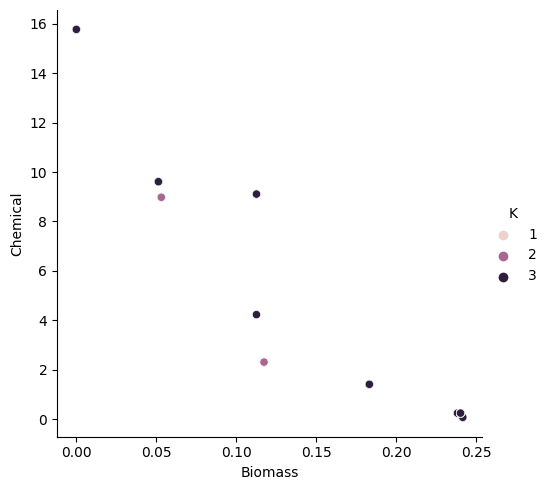

In [56]:
sns.relplot(data=DF[DF.Strain=='iJO1366'], x="Biomass", y="Chemical",hue='K')

In [57]:
masterdf = pd.read_csv('FD_OP_MasterSum_2.csv')

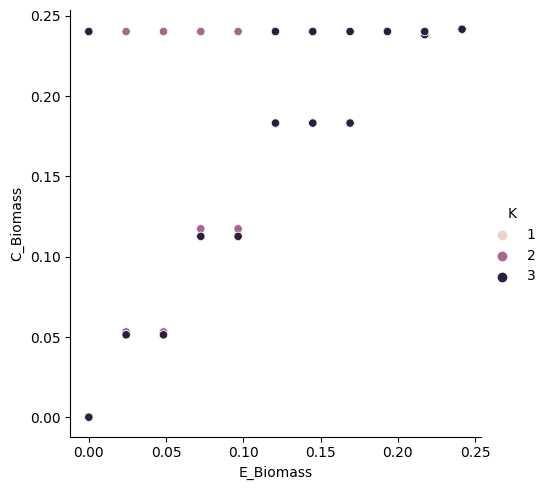

In [58]:
sns.relplot(data=masterdf[masterdf.Strain=='iJO1366'], x="E_Biomass", y="C_Biomass",hue='K')

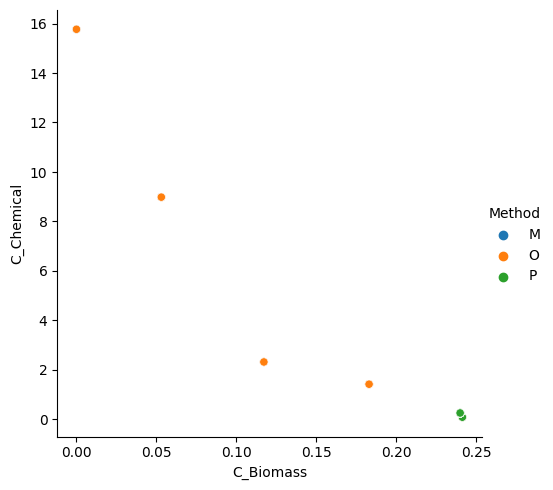

In [59]:
sns.relplot(
    data=masterdf[(masterdf.Strain == 'iJO1366') & (masterdf.K == 2)],
    x="C_Biomass", y="C_Chemical", hue="Method")

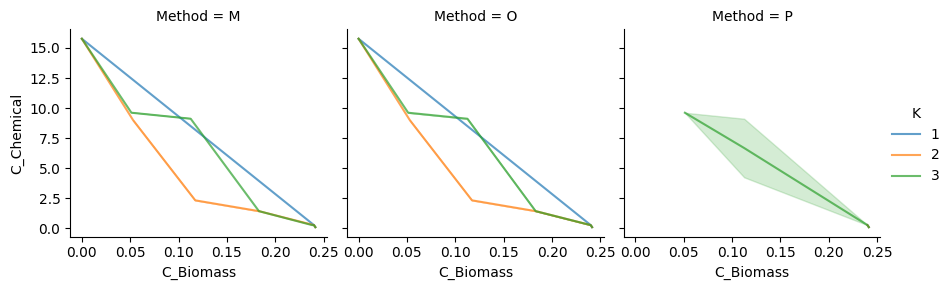

In [60]:
g = sns.FacetGrid(masterdf[masterdf.Strain=='iJO1366'], col="Method", hue="K")
g.map(sns.lineplot, "C_Biomass", "C_Chemical", alpha=.7)
g.add_legend()

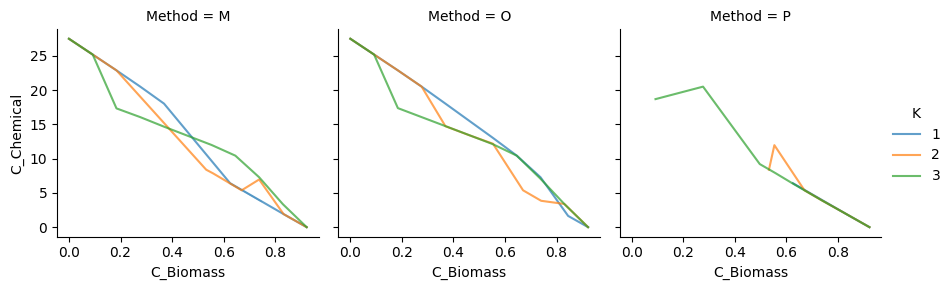

In [61]:
g = sns.FacetGrid(masterdf[masterdf.Strain=='iJR904'], col="Method", hue="K")
g.map(sns.lineplot, "C_Biomass", "C_Chemical", alpha=.7)
g.add_legend()

In [62]:
masterdf[(masterdf.Strain == 'iJO1366') & (masterdf.Method == 'O') & (masterdf.K ==1) & (masterdf.Tgt < 1) & (masterdf.Tgt > 0)]

,Unnamed: 0,C_Biomass,C_Chemical,Method,Time,Tgt,Strain,K,Strategy,E_Biomass,E_Chemical
45,12,0.24009,0.25037,O,1.103,9.000000e-01,iJO1366,1,['FUM'],0.21735,2.98538
46,13,0.24009,0.25037,O,1.480,8.000000e-01,iJO1366,1,['FUM'],0.19320,5.89071
47,14,0.24009,0.25037,O,1.435,7.000000e-01,iJO1366,1,['FUM'],0.16905,8.72155
48,15,0.24009,0.25037,O,1.507,6.000000e-01,iJO1366,1,['FUM'],0.14490,9.81530
49,16,0.24009,0.25037,O,1.584,5.000000e-01,iJO1366,1,['FUM'],0.12075,10.90905
50,17,0.24009,0.25037,O,1.468,4.000000e-01,iJO1366,1,['FUM'],0.09660,12.00279
51,18,0.24009,0.25037,O,1.456,3.000000e-01,iJO1366,1,['FUM'],0.07245,13.01748
52,19,0.24009,0.25037,O,1.656,2.000000e-01,iJO1366,1,['FUM'],0.04830,13.93462
53,20,0.24009,0.25037,O,2.532,1.000000e-01,iJO1366,1,['FUM'],0.02415,14.85176
54,21,-0.00000,15.76889,O,0.971,1.400000e-16,iJO1366,1,['ICDHyr'],0.00000,15.76889


In [63]:
af = pd.read_csv("FD_OP_complete_2.csv")

In [64]:
af[(af.Strain == 'iJO1366') & (af.Method == 'M') & (af.K == 2) & (af.Tgt < 1) & (masterdf.Tgt > 0)]

,Unnamed: 0,C_Bio,C_Chel,Method,Time,Tgt,Strain,K,Strategy,E_Bio,E_Che,IC_Bio,IC_Che
133,1,0.24009,0.25041,M,9.661,9.000000e-01,iJO1366,2,"['FUM', 'MDH2']",0.21735,2.98538,0.24009,0.25037
134,2,0.24008,0.25087,M,17.046,8.000000e-01,iJO1366,2,"['FUM', 'MDH']",0.19320,5.89071,0.24009,0.25037
135,3,0.18311,1.41483,M,18.857,7.000000e-01,iJO1366,2,"['PFL', 'TKT2']",0.16905,8.72155,0.18311,0.06069
136,4,0.18311,1.41483,M,22.020,6.000000e-01,iJO1366,2,"['PFL', 'TKT2']",0.14490,9.81530,0.18311,0.06069
137,5,0.18311,1.41483,M,17.256,5.000000e-01,iJO1366,2,"['PFL', 'TKT2']",0.12075,10.90905,0.18311,0.06069
138,6,0.11729,2.31314,M,16.237,4.000000e-01,iJO1366,2,"['PFL', 'RPI']",0.09660,12.00279,0.11729,2.31308
139,7,0.11729,2.31308,M,10.693,3.000000e-01,iJO1366,2,"['PFL', 'RPI']",0.07245,13.01748,0.11729,2.31308
140,8,0.05310,8.97928,M,12.570,2.000000e-01,iJO1366,2,"['GLCptspp', 'PYK']",0.04830,13.93462,0.05310,8.97926
141,9,0.05310,8.97928,M,13.231,1.000000e-01,iJO1366,2,"['GLCptspp', 'PYK']",0.02415,14.85176,0.05310,8.97926
142,10,-0.00000,15.76889,M,2.039,1.400000e-16,iJO1366,2,"['RPE', 'RPI']",0.00000,15.76889,0.00000,0.00000


In [65]:
af['pctGro'] = af['Tgt'].apply(lambda x: f"{int(x*100)}")

In [66]:
af[(af.Strain == 'iAF1260') & (af.Method == 'M') & (af.K == 3) & (af.Tgt < 1) & (masterdf.Tgt >= .01)]

,Unnamed: 0,C_Bio,C_Chel,Method,Time,Tgt,Strain,K,Strategy,E_Bio,E_Che,IC_Bio,IC_Che,pctGro
199,1,0.79701,2.33059,M,10.867,0.9,iAF1260,3,"['ALCD2x', 'TKT1', 'TKT2']",0.79701,2.39767,0.79701,0.0,90
200,2,0.70846,3.94948,M,11.082,0.8,iAF1260,3,"['ACKr', 'TKT2', 'TALA']",0.70846,3.99242,1.00000,2000.0,80
201,3,0.61990,5.55427,M,5.850,0.7,iAF1260,3,"['ALCD2x', 'TKT1', 'TKT2']",0.61990,5.58510,1.00000,2000.0,70
202,4,0.53134,7.15790,M,7.526,0.6,iAF1260,3,"['ACKr', 'GND', 'TKT2']",0.53134,7.17777,1.00000,2000.0,60
203,5,0.44279,8.77050,M,5.850,0.5,iAF1260,3,"['ACALD', 'RPI', 'PYK']",0.44279,8.77044,0.86850,0.0,50
204,6,0.35423,10.36317,M,3.486,0.4,iAF1260,3,"['GND', 'RPE', 'PYK']",0.35423,10.36312,0.54818,0.0,40
205,7,0.26567,11.95254,M,5.551,0.3,iAF1260,3,"['ACKr', 'TKT2', 'TALA']",0.26567,11.95520,1.00000,2000.0,30
206,8,0.17711,13.54423,M,3.511,0.2,iAF1260,3,"['GND', 'PGL', 'RPE']",0.17711,13.54418,0.17711,0.0,20
207,9,0.08856,15.13321,M,2.669,0.1,iAF1260,3,"['G6PDH2r', 'GND', 'RPE']",0.08856,15.13316,1.00000,2000.0,10


In [67]:
af[(af.Strain == 'iJR904') & (af.Method == 'P') & (af.K == 2) & (af.Tgt < 1) & (masterdf.Tgt >= .01)]

,Unnamed: 0,C_Bio,C_Chel,Method,Time,Tgt,Strain,K,Strategy,E_Bio,E_Che,IC_Bio,IC_Che,pctGro
188,23,0.83255,1.90413,P,1.151,0.9,iJR904,2,"['PGI', 'TKT1']",0.82975,3.72710,0.83255,1.90413,90
189,24,0.74006,3.84645,P,1.686,0.8,iJR904,2,"['PGL', 'TPI']",0.73756,7.28433,0.74006,3.84645,80
190,25,0.66986,5.37864,P,2.144,0.7,iJR904,2,"['HEX1', 'PGM']",0.64536,10.43530,0.66986,5.37864,70
191,26,0.55317,11.96504,P,1.434,0.6,iJR904,2,"['ACKr', 'ICDHyr']",0.55317,13.02168,0.55317,0.31689,60
192,27,0.53219,8.38375,P,2.292,0.5,iJR904,2,"['PGK', 'PGL']",0.46097,15.52386,0.53219,8.38375,50
193,28,0.53219,8.38375,P,2.104,0.4,iJR904,2,"['GAPD', 'PGL']",0.36878,18.02605,0.53219,8.38375,40
194,29,0.53219,8.38375,P,2.160,0.3,iJR904,2,"['G6PDH2r', 'PGK']",0.27658,20.50490,0.53219,8.38375,30
195,30,0.53219,8.38375,P,2.126,0.2,iJR904,2,"['PGK', 'PGL']",0.18439,22.87756,0.53219,8.38375,20
196,31,0.53219,8.38375,P,2.387,0.1,iJR904,2,"['G6PDH2r', 'PGK']",0.09219,25.18522,0.53219,8.38375,10


In [68]:
af[(af.Strain == 'iJO1366') & (af.Method == 'P') & (af.K == 2) & (af.Tgt < 1) & (masterdf.Tgt >= .01)]

,Unnamed: 0,C_Bio,C_Chel,Method,Time,Tgt,Strain,K,Strategy,E_Bio,E_Che,IC_Bio,IC_Che,pctGro
155,23,0.24009,0.25037,P,1.676,0.9,iJO1366,2,"['FUM', 'PYK']",0.21735,2.98538,0.24009,0.25037,90
156,24,0.24009,0.25037,P,2.032,0.8,iJO1366,2,"['FUM', 'HEX1']",0.19320,5.89071,0.24009,0.25037,80
157,25,0.24009,0.25037,P,3.118,0.7,iJO1366,2,"['FUM', 'MDH3']",0.16905,8.72155,0.24009,0.25037,70
158,26,0.24009,0.25037,P,3.722,0.6,iJO1366,2,"['FUM', 'G6PDH2r']",0.14490,9.81530,0.24009,0.25037,60
159,27,0.24009,0.25037,P,4.884,0.5,iJO1366,2,"['FUM', 'MDH2']",0.12075,10.90905,0.24009,0.25037,50
160,28,0.24009,0.25037,P,4.111,0.4,iJO1366,2,"['FRD2', 'FUM']",0.09660,12.00279,0.24009,0.25037,40
161,29,0.24009,0.25037,P,4.236,0.3,iJO1366,2,"['FUM', 'MDH3']",0.07245,13.01748,0.24009,0.25037,30
162,30,0.24009,0.25037,P,4.652,0.2,iJO1366,2,"['FUM', 'MDH2']",0.04830,13.93462,0.24009,0.25037,20
163,31,0.24009,0.25037,P,4.717,0.1,iJO1366,2,"['FUM', 'PFK']",0.02415,14.85176,0.24009,0.25037,10


In [69]:
af[(af.Strain == 'iJO1366') & (af.Method == 'P') & (af.K == 2) & (af.Tgt < 1) & (masterdf.Tgt >= .01)]

,Unnamed: 0,C_Bio,C_Chel,Method,Time,Tgt,Strain,K,Strategy,E_Bio,E_Che,IC_Bio,IC_Che,pctGro
155,23,0.24009,0.25037,P,1.676,0.9,iJO1366,2,"['FUM', 'PYK']",0.21735,2.98538,0.24009,0.25037,90
156,24,0.24009,0.25037,P,2.032,0.8,iJO1366,2,"['FUM', 'HEX1']",0.19320,5.89071,0.24009,0.25037,80
157,25,0.24009,0.25037,P,3.118,0.7,iJO1366,2,"['FUM', 'MDH3']",0.16905,8.72155,0.24009,0.25037,70
158,26,0.24009,0.25037,P,3.722,0.6,iJO1366,2,"['FUM', 'G6PDH2r']",0.14490,9.81530,0.24009,0.25037,60
159,27,0.24009,0.25037,P,4.884,0.5,iJO1366,2,"['FUM', 'MDH2']",0.12075,10.90905,0.24009,0.25037,50
160,28,0.24009,0.25037,P,4.111,0.4,iJO1366,2,"['FRD2', 'FUM']",0.09660,12.00279,0.24009,0.25037,40
161,29,0.24009,0.25037,P,4.236,0.3,iJO1366,2,"['FUM', 'MDH3']",0.07245,13.01748,0.24009,0.25037,30
162,30,0.24009,0.25037,P,4.652,0.2,iJO1366,2,"['FUM', 'MDH2']",0.04830,13.93462,0.24009,0.25037,20
163,31,0.24009,0.25037,P,4.717,0.1,iJO1366,2,"['FUM', 'PFK']",0.02415,14.85176,0.24009,0.25037,10


In [70]:
name = 'iJO1366'

In [71]:
name[:3]

'iJO'

In [72]:
tg = 90/100

In [73]:
f"{int(tg*100)}"

'90'

In [79]:
target = 90
while target/100 > 0:
    print(f"{float(target/100)}")
    target -= 10

0.9
0.8
0.7
0.6
0.5
0.4
0.3
0.2
0.1
